In [151]:
import random, csv, sys, itertools
import pandas as pd
import numpy as np
import re
from api_keys import api_keys, user
import random, csv, sys, itertools
from geopy import geocoders 
import matplotlib
import matplotlib.pyplot as plt
import operator
import datetime
import sys
import imageio
import prophet
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

df = pd.read_csv('../data/clean_data_v3.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df

,Unnamed: 0,incident_id,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_average_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,461105,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,20.00,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,0::Unknown,0::Unknown
2013-01-01,1,460726,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,20.00,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2013-01-01,2,478855,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,31.20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13
2013-01-05,3,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,37.75,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
2013-01-07,4,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,31.25,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27
2013-01-07,5,478948,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,33.50,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Unknown,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72,11
2013-01-19,6,479363,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,20.33,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10,14
2013-01-21,7,479374,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,0::Unknown,NaN,0::Unknown,0::Male||1::Male||2::Male||3::Male||4::Male,0::Unknown,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http:/

In [175]:
len(df)

239677

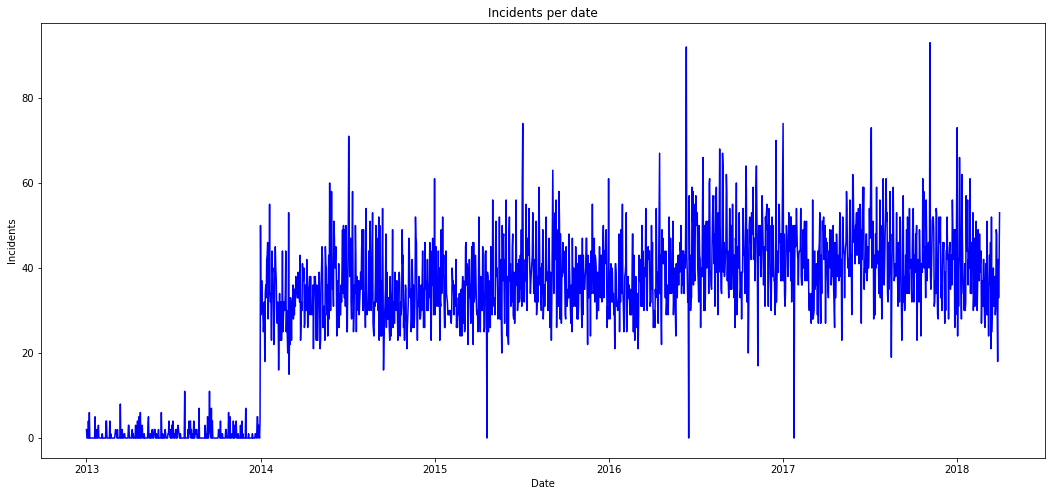

In [169]:
# With 2013
# incident_df = df.groupby(pd.Grouper(freq='d')).agg({'incident_id':'count'}).rename(columns={'incident_id':'incidents'})
#incident_df.plot(figsize=(16,5), title='Daily incidents in the US', color='#ff4500')

incident_df = df.groupby(pd.Grouper(freq='d')).agg({'n_killed':'sum'})


# #print(incident_df)
plt.figure(figsize=(18, 8))
plt.plot(incident_df.index, incident_df['n_killed'], 'b-', label = 'Incidents')
plt.xlabel('Date')
plt.ylabel('Incidents')
plt.title('Incidents per date')
plt.show()

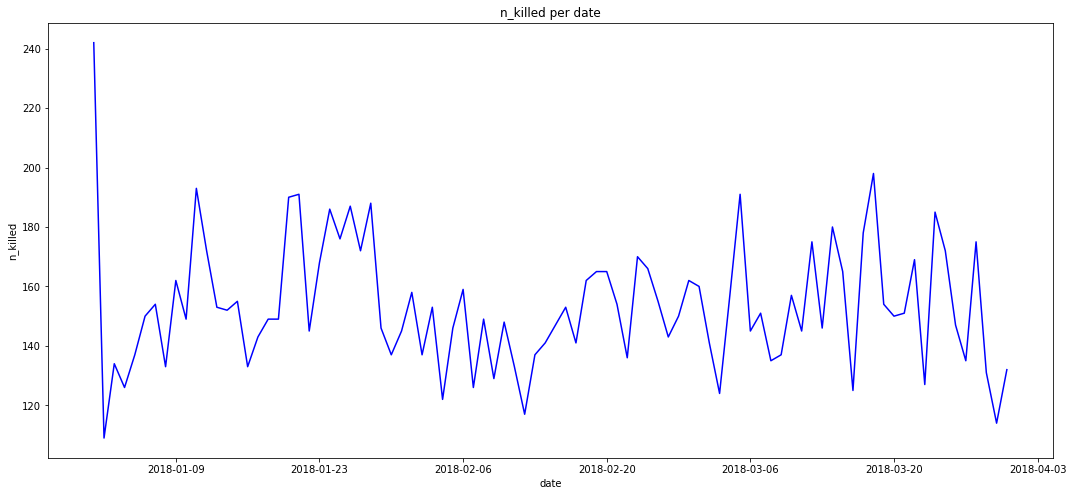

In [170]:
#mask = ((df.index.year > 2013) & (df.index.year < 2018))
mask = (df.index.year > 2017)
df_without_2013 = df.loc[mask]

#incident_df_without_2013 = df_without_2013.groupby(pd.Grouper(freq='d')).agg({'incident_id':'count'}).rename(columns={'incident_id':'incidents'})
incident_df_without_2013 = df_without_2013.groupby(pd.Grouper(freq='d')).agg({'n_killed':'count'})

plt.figure(figsize=(18, 8))
plt.plot(incident_df_without_2013.index, incident_df_without_2013['n_killed'], 'b-', label = 'n_killed')
plt.xlabel('date')
plt.ylabel('n_killed') 
plt.title('n_killed per date')

plt.show()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds    y
0  2018-01-01  242
1  2018-01-02  109
2  2018-01-03  134
3  2018-01-04  126
4  2018-01-05  137
5  2018-01-06  150
6  2018-01-07  154
7  2018-01-08  133
8  2018-01-09  162
9  2018-01-10  149
10 2018-01-11  193
11 2018-01-12  172
12 2018-01-13  153
13 2018-01-14  152
14 2018-01-15  155
15 2018-01-16  133
16 2018-01-17  143
17 2018-01-18  149
18 2018-01-19  149
19 2018-01-20  190
20 2018-01-21  191
21 2018-01-22  145
22 2018-01-23  168
23 2018-01-24  186
24 2018-01-25  176
25 2018-01-26  187
26 2018-01-27  172
27 2018-01-28  188
28 2018-01-29  146
29 2018-01-30  137
..        ...  ...
60 2018-03-02  141
61 2018-03-03  124
62 2018-03-04  157
63 2018-03-05  191
64 2018-03-06  145
65 2018-03-07  151
66 2018-03-08  135
67 2018-03-09  137
68 2018-03-10  157
69 2018-03-11  145
70 2018-03-12  175
71 2018-03-13  146
72 2018-03-14  180
73 2018-03-15  165
74 2018-03-16  125
75 2018-03-17  178
76 2018-03-18  198
77 2018-03-19  154
78 2018-03-20  150
79 2018-03-21  151
80 2018-03-2

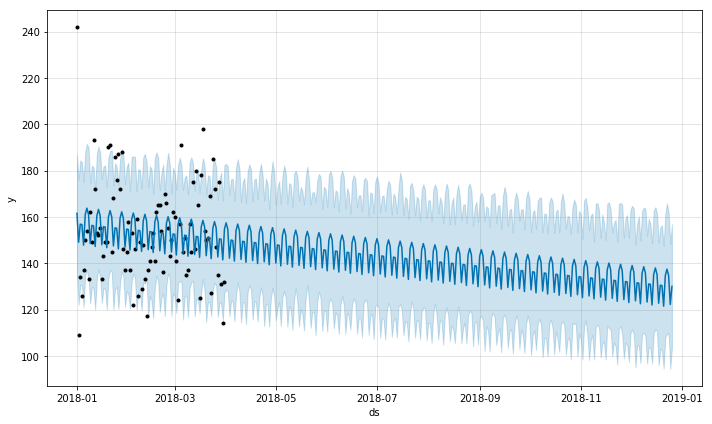

In [174]:
import fbprophet

# future = m.make_future_dataframe(periods=270,freq='D')
# forecast = m.predict(future)
# fig = m.plot(forecast)


incident_after_2013 = incident_df_without_2013.rename(columns={'date':'ds','n_killed':'y'}) 
incident_after_2013.index.names = ['ds']

incident_after_2013 = incident_after_2013.reset_index(['ds'])

print(incident_after_2013)

prophet = fbprophet.Prophet()
prophet.fit(incident_after_2013)

forecast = shootings_prophet.make_future_dataframe(periods=270, freq='D')


forecast = prophet.predict(forecast)

fig = prophet.plot(forecast)

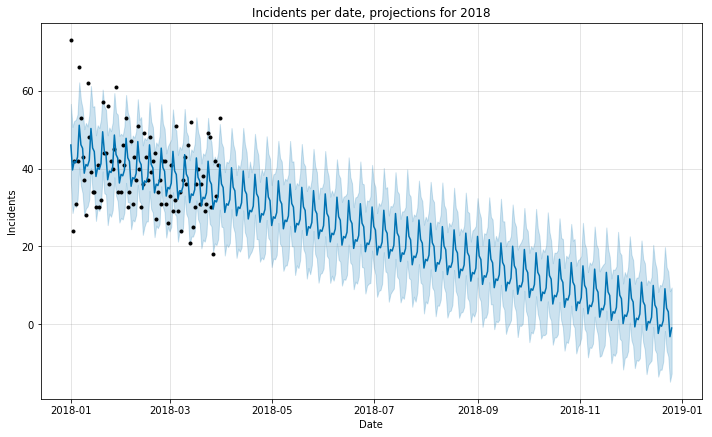

In [173]:
shootings_prophet.plot(shootings_forecast, xlabel = 'Date', ylabel = 'Incidents')
plt.title('Incidents per date, projections for 2018');

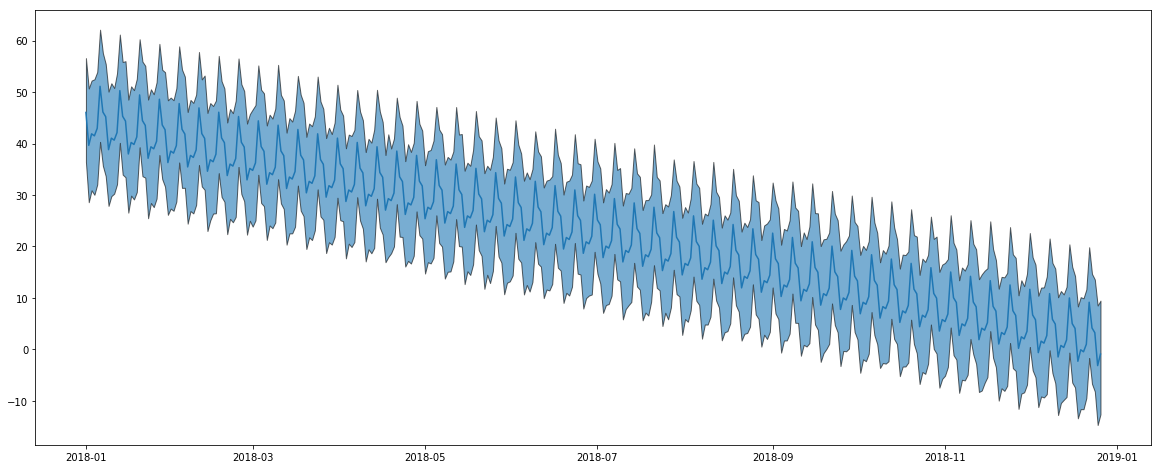

In [172]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(20, 8));

shootings_forecast

# Plot estimate
ax.plot(shootings_forecast['ds'], shootings_forecast['yhat'], label = 'gm prediction');

# # Plot uncertainty values
ax.fill_between(shootings_forecast['ds'].dt.to_pydatetime(), shootings_forecast['yhat_upper'], shootings_forecast['yhat_lower'], alpha=0.6, edgecolor = 'k');

# # Plot estimate and uncertainty for tesla
# plt.xlabel('Date'); plt.ylabel('Incidents'); plt.title('Incidents forecast');